In [6]:
## READ LABELSET
#
lines = [line.rstrip() for line in open('/data/car/label_structure.csv')][1:]
labelset = [line.split(',')[1] for line in lines]
print len(labelset)


67


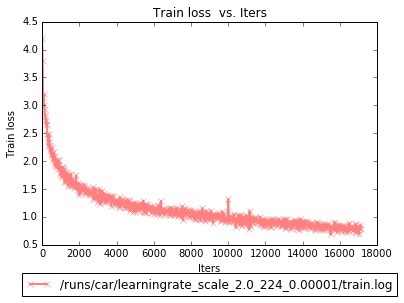

In [1]:
% matplotlib inline
plot_chart(6, '~/temp.png', ['/runs/car/learningrate_scale_2.0_224_0.00001/train.log'])

best itt: 20000


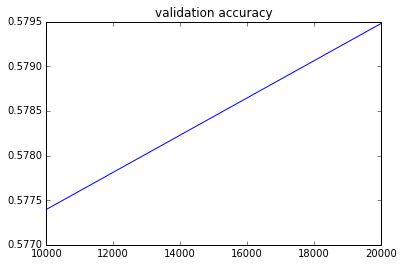

In [3]:
import catlin_caffe_tools as cct
bestitt, dd = cct.find_best_iter('/runs/car/learningrate_scale_2.0_224_0.001/')
plt.plot([d[0] for d in dd], [d[1] for d in dd])
plt.title('validation accuracy')
print 'best itt: {}'.format(bestitt)

/home/caffe/beijbom_python_lib/beijbom_confmatrix.py:72: RuntimeWarning: invalid value encountered in divide
  cm = cm / totals[:, np.newaxis]


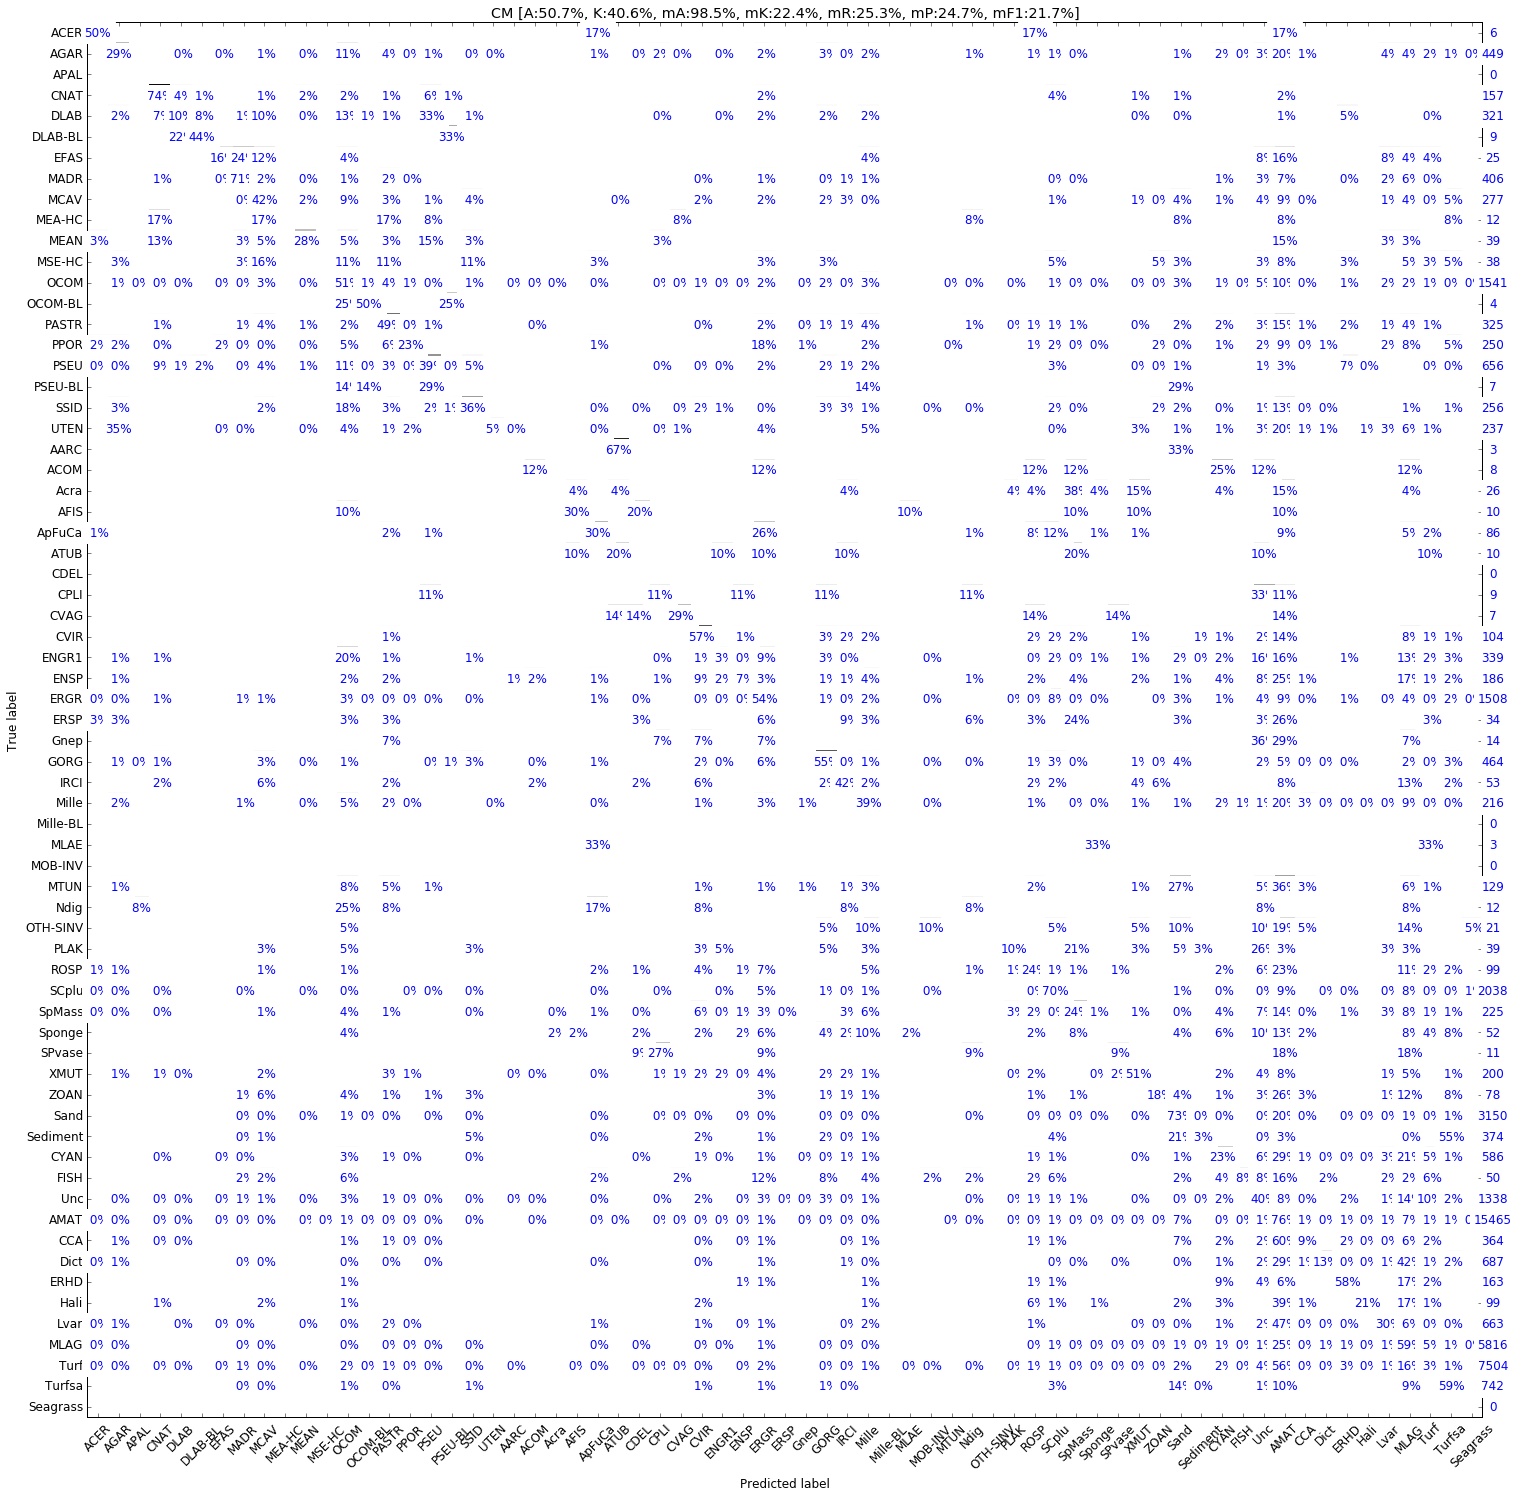

In [27]:
%matplotlib inline
(gtlist, estlist, scorelist) = pload('/runs/car/scalesweep_scale_2.0/predictions_on_test.p')
plt.rcParams['figure.figsize'] = 25, 25
cm = confmatrix.ConfMatrix(len(labelset), labelset = labelset)
cm.add(gtlist, estlist)
cm.show()

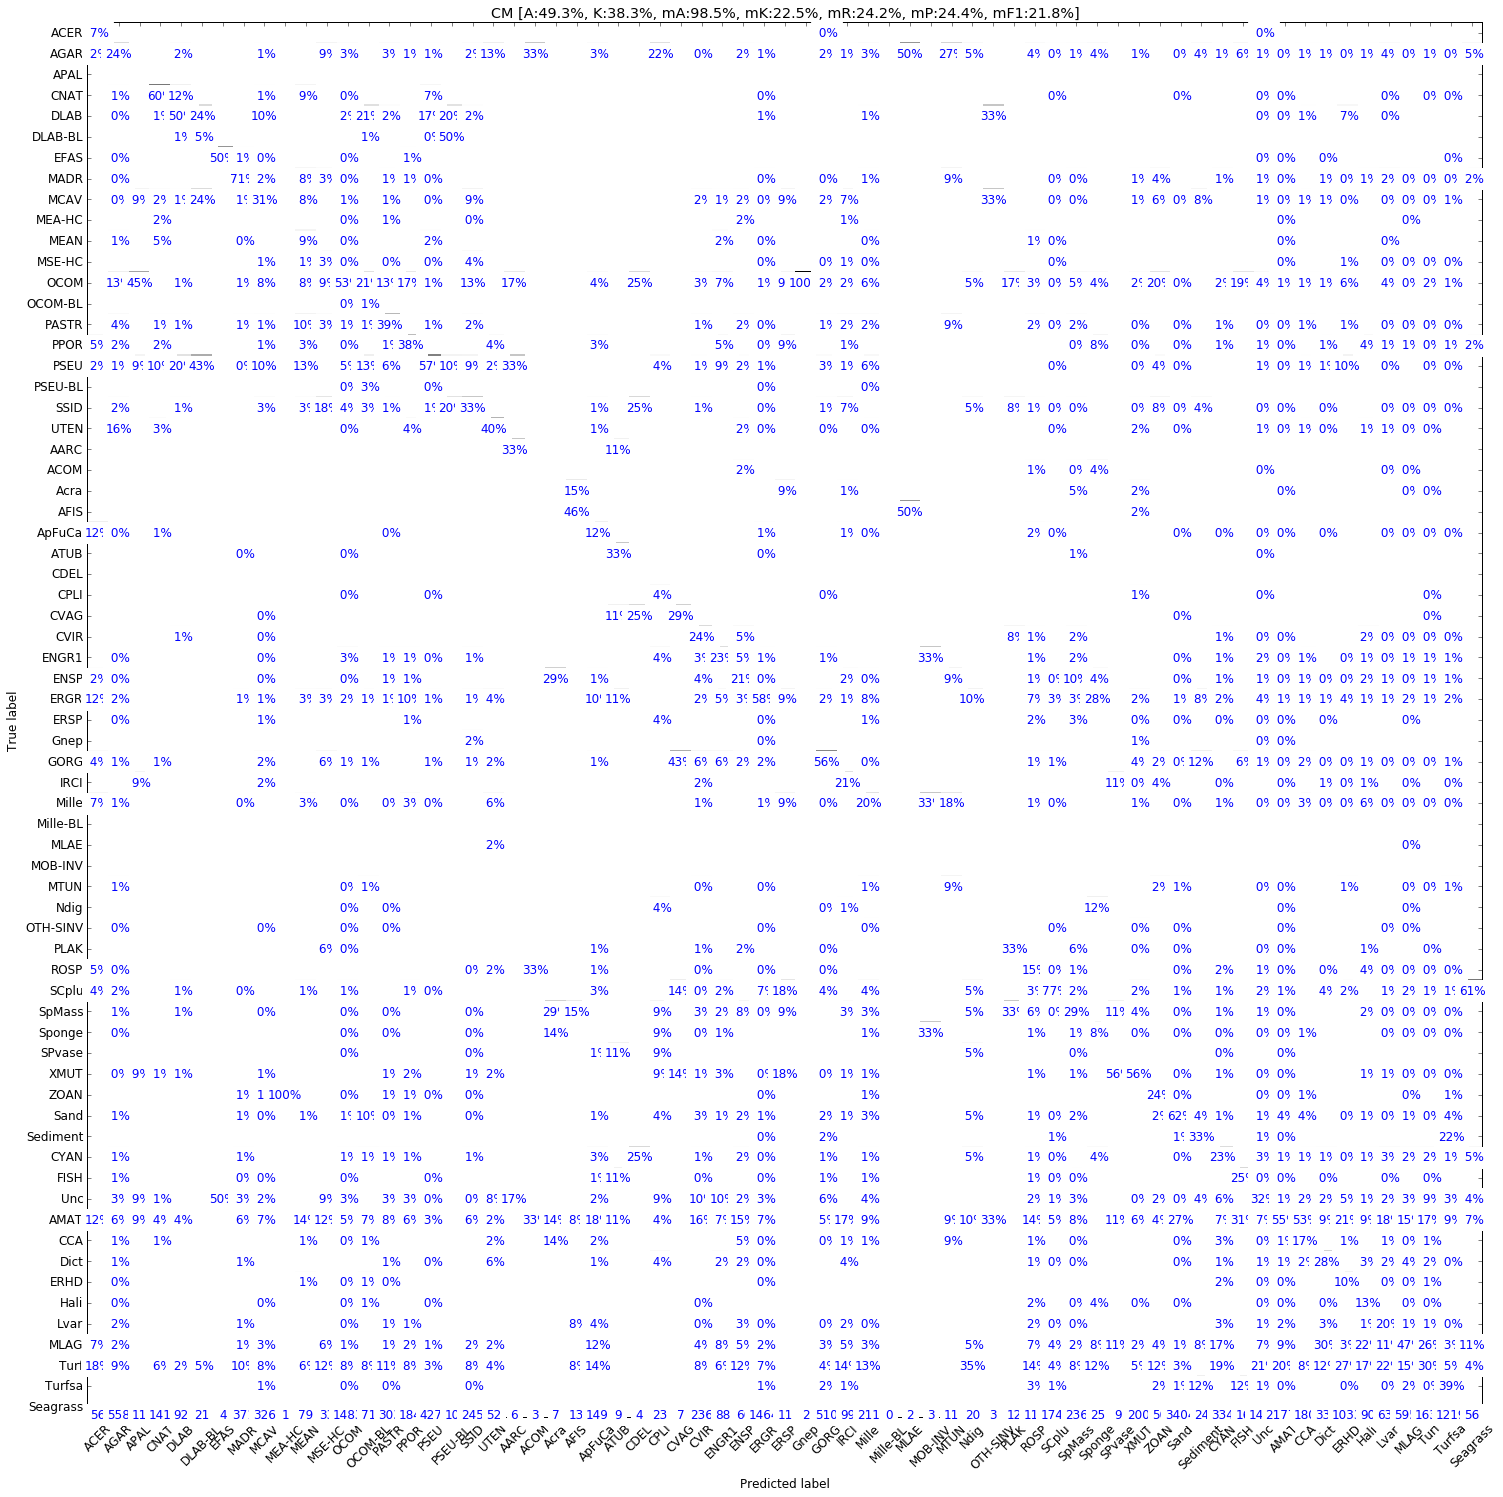

In [16]:
%matplotlib inline
(gtlist, estlist, scorelist) = pload('/runs/car/caribbean_first/predictions_on_test.p')
plt.rcParams['figure.figsize'] = 25, 25
cm = confmatrix.ConfMatrix(len(labelset), labelset = labelset)
cm.add(gtlist, estlist)
cm.show(normalize='precision')

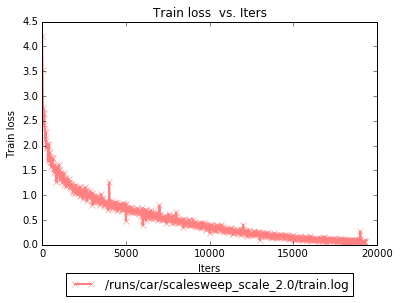

In [3]:
% matplotlib inline
plot_chart(6, '~/temp.png', ['/runs/car/scalesweep_scale_2.0/train.log'])

best itt: 6000


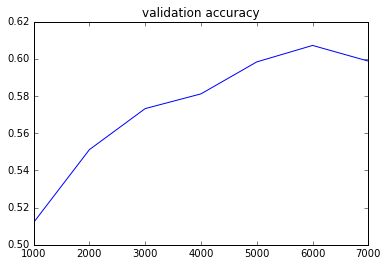

In [4]:
import catlin_caffe_tools as cct
bestitt, dd = cct.find_best_iter('/runs/car/scalesweep_ratio_22/')
plt.plot([d[0] for d in dd], [d[1] for d in dd])
plt.title('validation accuracy')
print 'best itt: {}'.format(bestitt)

In [ ]:
    import catlin_caffe_tools as cct
    workdir='/runs/car/learningrate_scale_2.0_224_0.001/'
    gpuid=0
    
    # find and load optimal model
    bestiter, _ = cct.find_best_iter(workdir)
    caffemodel = 'snapshot_iter_{}.caffemodel'.format(bestiter)
    net = bct.load_model(workdir, caffemodel, gpuid = gpuid, net_prototxt = 'testnet.prototxt')

    # load test-data
    pyparams = pload(osp.join(workdir, 'testpyparams.pkl'))
    imlist = [line.rstrip() for line in open(osp.join(workdir, 'testlist.txt'))]
    with open(osp.join(workdir, 'testdict.json')) as f:
        imdict = json.load(f)

    # run on test-data
    (gtlist, estlist, scorelist) = bct.classify_from_patchlist(imlist, imdict, pyparams, net)
    psave((gtlist, estlist, scorelist), osp.join(workdir, 'predictions_on_test.p'))

DataLayer initialized with 960 images, 5 imgs per batch, and 224x224 pixel patches


/home/caffe/beijbom_python_lib/beijbom_confmatrix.py:72: RuntimeWarning: invalid value encountered in divide
  cm = cm / totals[:, np.newaxis]


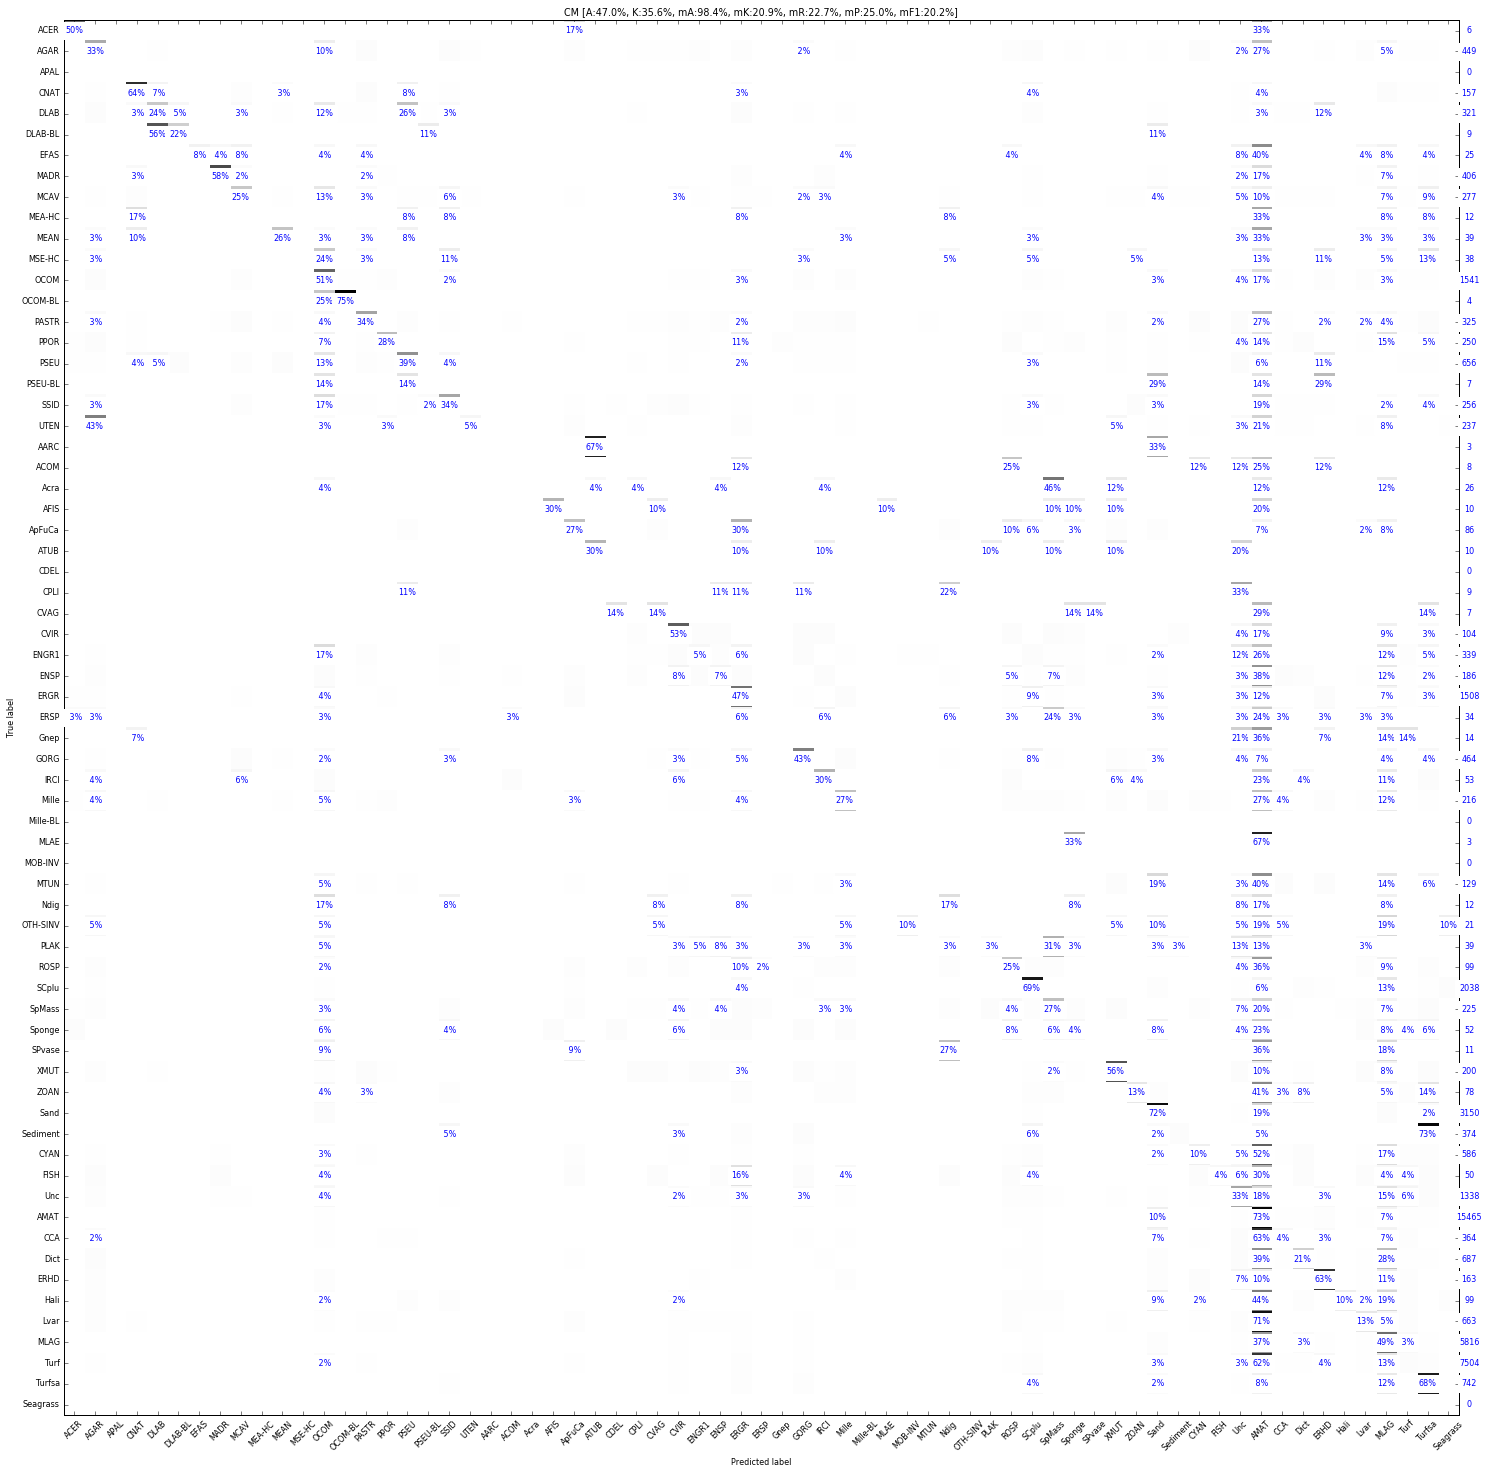

In [7]:
%matplotlib inline
(gtlist, estlist, scorelist) = pload('/runs/car/learningrate_scale_2.0_224_0.00001/predictions_on_test.p')
plt.rcParams['figure.figsize'] = 25, 25
cm = confmatrix.ConfMatrix(len(labelset), labelset = labelset)
cm.add(gtlist, estlist)
cm.show(threshold = 2, fontsize=8)

['coral', 'other']


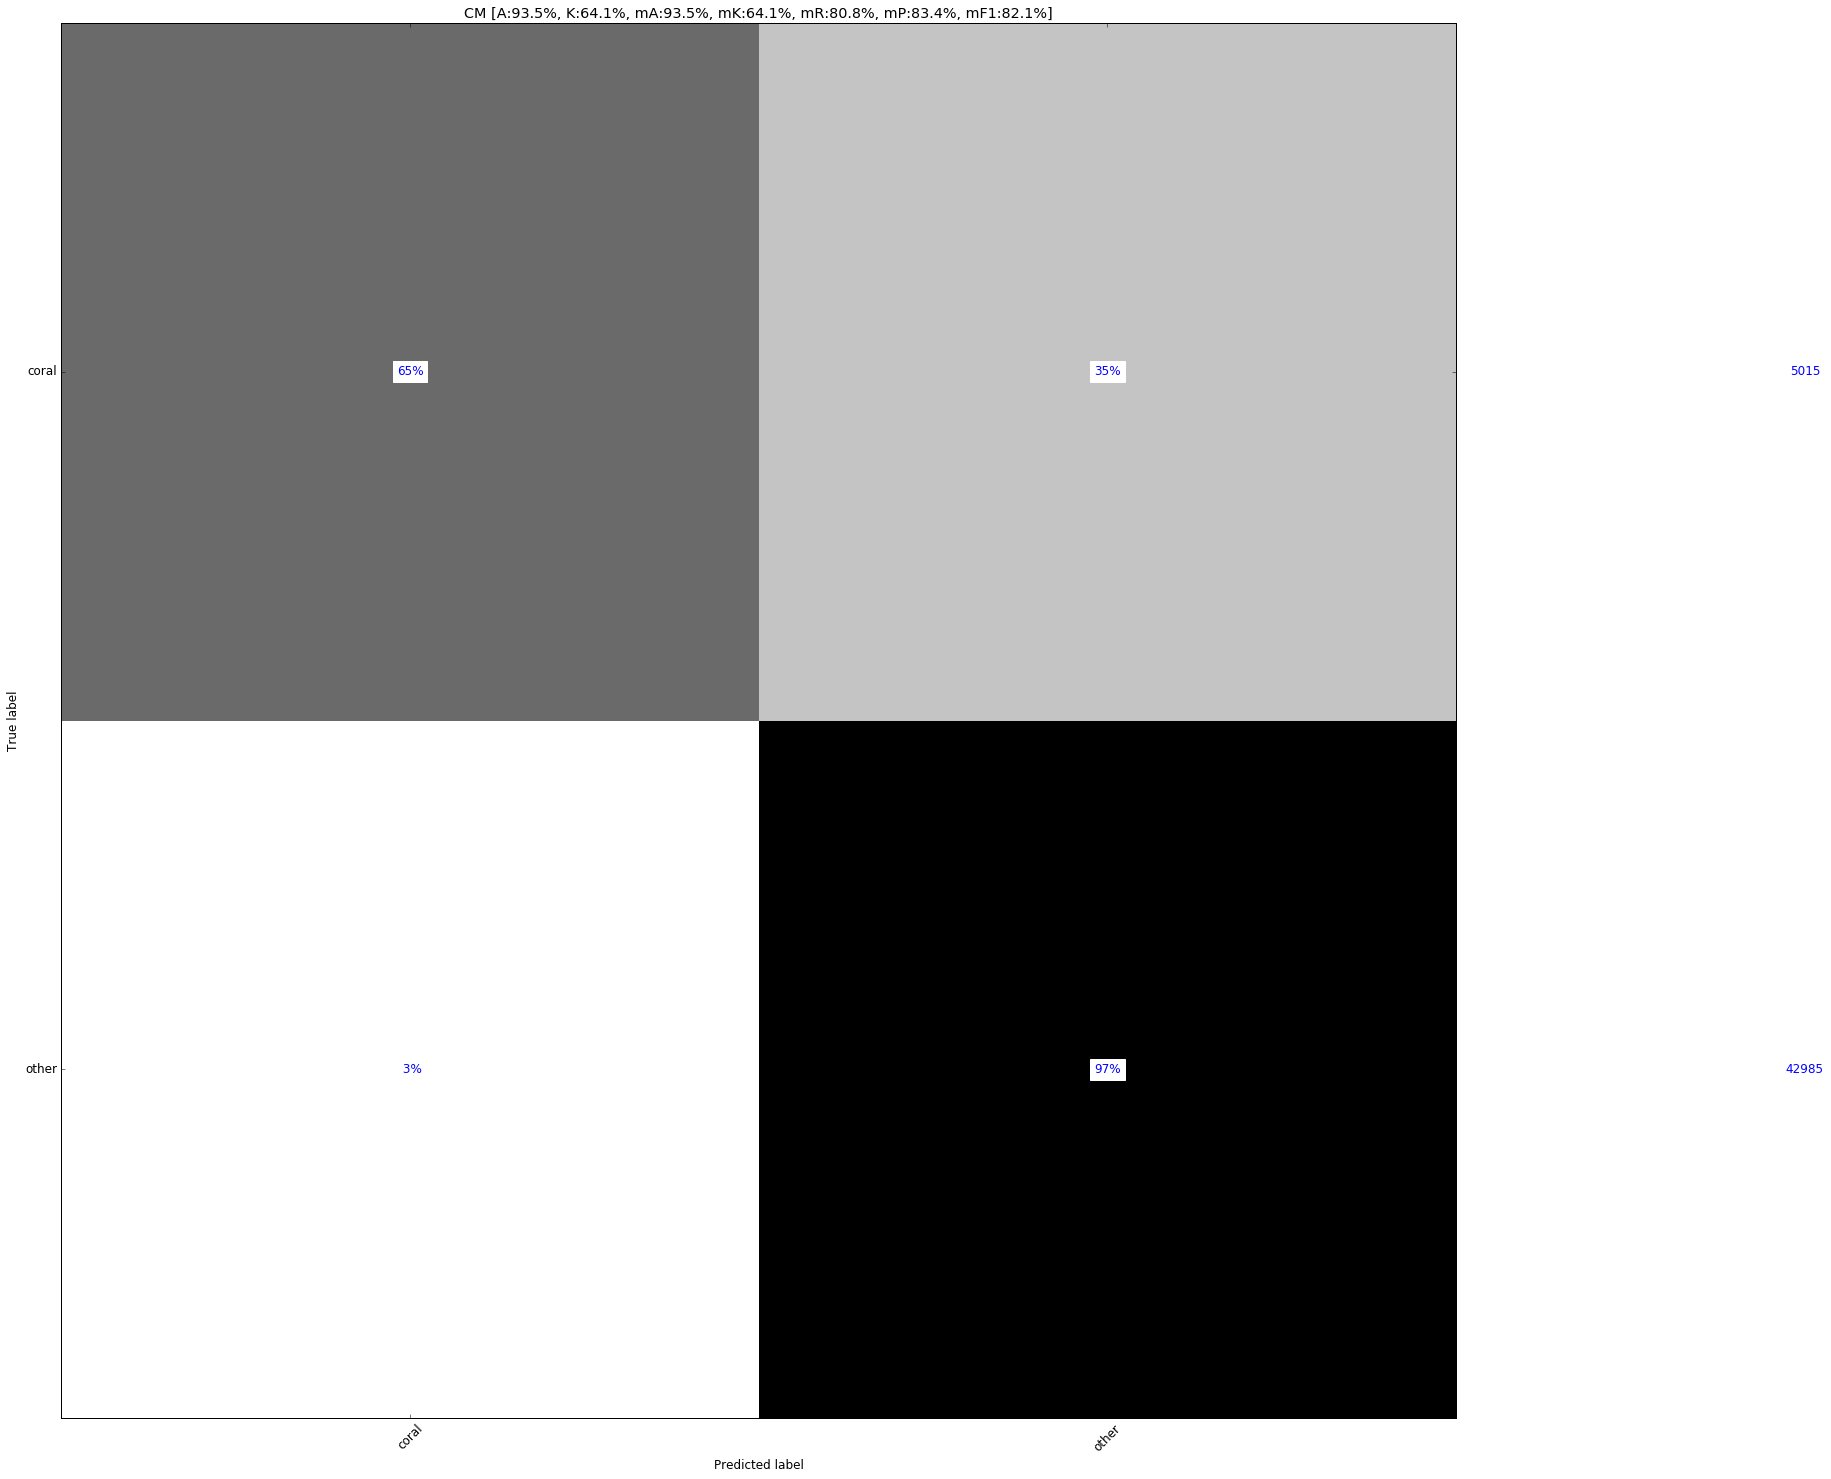

In [9]:
## READ LABELSET AND COLLAPSE CM
from collections import defaultdict
from itertools import count
from functools import partial

## READ LABELSET
#
lines = [line.rstrip() for line in open('/data/car/label_structure.csv')][1:]
labelset = [line.split(',')[1] for line in lines]
## GENERATE FULL CM
(gtlist, estlist, scorelist) = pload('/runs/car/scalesweep_scale_2.0/predictions_on_test.p')

cm = confmatrix.ConfMatrix(len(labelset), labelset = labelset)
cm.add(gtlist, estlist)
#%matplotlib inline    
#plt.rcParams['figure.figsize'] = 25, 25
#cm.show(threshold = 2, fontsize=8)
## define collapsing tier by column number
ct=3
lines = [line.rstrip() for line in open('/data/car/label_structure.csv')][1:]
labels= [line.split(',')[ct] for line in lines]
label_to_number = defaultdict(partial(next, count(0)))
cmap=[(label_to_number[label],label) for label in labels]
#print(cmap)
collapsemap=[int(i[0]) for i in cmap]
#print(collapsemap)
collapsemap=np.array(map(int, collapsemap))
#print(collapsemap)
##COLLAPSE CM
cmc=cm.collapse(collapsemap)
cmap=set(cmap)
cmap = sorted(list(cmap), key=lambda tup: tup[0])
labelsetc = [str(i[1]) for i in cmap]
cm2= confmatrix.ConfMatrix(len(labelsetc), labelset = labelsetc)
print(labelsetc)
for x in range(cmc.shape[0]):
    for y in range(cmc.shape[1]):
        cm2.cm[x,y]=cmc[x,y]
        
##PLOT COLLAPSED CM
%matplotlib inline    
plt.rcParams['figure.figsize'] = 25, 25
cm2.show(threshold = 2, fontsize=12)



#print(collapsemap2==0)
#print(cmin[0,collapsemap==0])
#print(np.sum(cmin[:,collapsemap==0], axis=1))



In [86]:
label_to_number = defaultdict(partial(next, count(0)))
collapsemap=[(label_to_number[label], label) for label in labels]
cmap=set(collapsemap)
cmap=list(cmap)
cmap = sorted(list(cmap), key=lambda tup: tup[0])
print(cmap)

collapsemap=[int(i[0]) for i in collapsemap]
print(collapsemap)

[(0, 'ACER'), (1, 'APAL'), (2, 'EFAS'), (3, 'MADR'), (4, 'PPOR'), (5, 'OCOM'), (6, 'SSID'), (7, 'CNAT'), (8, 'DLAB'), (9, 'MEA-HC'), (10, 'MEAN'), (11, 'PSEU'), (12, 'AGAR'), (13, 'MCAV'), (14, 'MSE-HC'), (15, 'PASTR'), (16, 'XMUT'), (17, 'SpEnc'), (18, 'CVIR'), (19, 'SpTube'), (20, 'SpEre'), (21, 'AFIS'), (22, 'SpRope'), (23, 'CVAG'), (24, 'SpMass'), (25, 'IRCI'), (26, 'SpOTH'), (27, 'ScOTH'), (28, 'GORG'), (29, 'Mille'), (30, 'OTH'), (31, 'SCplu'), (32, 'Sand'), (33, 'Sediment'), (34, 'malg'), (35, 'Unc'), (36, 'turf'), (37, 'Seagrass')]
[0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 8, 9, 10, 11, 11, 12, 12, 13, 14, 15, 16, 17, 18, 17, 17, 19, 20, 21, 22, 19, 19, 23, 20, 19, 22, 19, 24, 24, 25, 24, 24, 26, 27, 27, 28, 29, 29, 30, 30, 30, 31, 30, 32, 33, 34, 30, 35, 36, 36, 34, 34, 34, 34, 34, 36, 33, 37]
